In [2]:
# -*- coding: utf-8 -*-
# learning
# author: Cheng Zheng

import os
import numpy as np
import pandas as pd

# Machine learning algorithms
from sklearn.kernel_ridge import KernelRidge #Kernel ridge regression

# Cross-validation
'''
GridSearchCV = Perform an optimization of the parameters. 可以保证在指定的参数范围内找到精度最高的参数
                1. search for the best parameters for model; 
                2. automatically fit a new model on the training dataset w/ the parameters that 
                    can yield the best cross-validation performance.
cross_val_score = to implement cross-validation in scikit-learn.
KFold: just to divide the dataset.
    - When an integer is passed to the cv parameter of cross_val_score():
        cv=int (same as cv=StratifiedKFold(n_splits=int)) is used if the estimator is a classifier 
        and y is either binary or multiclass; In all other cases, KFold is used.
'''
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir +'/y_MVPA/y_MVPA.xlsx')#to import the preprocessed dataset into a variable

# print(dataset)

In [3]:
X = pd.DataFrame(dataset.iloc[:,4:9])
y = pd.DataFrame(dataset.iloc[:,9])
other = pd.DataFrame(dataset.iloc[:,:4])

In [4]:
# Kernel ridge regression
'''
(same as svr)
# kernel = Kernel mapping used internally. This parameter is directly passed to pairwise_kernel. 
    If kernel is a string, it must be one of the metrics in pairwise.PAIRWISE_KERNEL_FUNCTIONS. 
    If kernel is “precomputed”, X is assumed to be a kernel matrix. 
    Alternatively, if kernel is a callable function, it is called on each pair of instances (rows) 
        and the resulting value recorded. 
    The callable should take two rows from X as input and return the corresponding kernel value as a single number. 
# gamma = Gamma parameter for the RBF, laplacian, polynomial, exponential chi2 and sigmoid kernels. 
    Interpretation of the default value is left to the kernel; see the documentation for sklearn.metrics.pairwise. 
    Ignored by other kernels.

(same as ridge)
# alpha = Regularization strength; must be a positive float. 
    Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
    Larger values specify stronger regularization. 
    Alpha corresponds to 1 / (2C) in other linear models such as LogisticRegression or LinearSVC. 
    If an array is passed, penalties are assumed to be specific to the targets. 
    Hence they must correspond in number.
'''

'''
# kernelRidge要考虑的参数是kernel,gamma,alpha，通过GridSearchCV我们需要确定param_grid也就是这个参数有哪些值才能找到最佳模型。
# np.logspace用于创建等比数列, 开始点和结束点是10的幂, 
    i.e. logspace(-2,1,4)表示起始数字为10^-2，结尾数字为10^1，元素个数为4的等比数列
'''
# Set param_grid, aka the main parameters in Ridge
param_grid_KernelRidge = [
    {'kernel':['rbf'],
     'gamma':np.logspace(-2,2,5),
     'alpha':np.logspace(-6,6,13)
    },
    {'kernel':['linear'],
     'alpha':np.logspace(-6,6,13)
    }
]

rule='r2'

# GridSearchCV
kr = GridSearchCV(estimator=KernelRidge(), # algorithm - Kernel ridge regression
                  param_grid=param_grid_KernelRidge, # specify the parameters to search over using a dict or list of dictionaries
                  cv=10, # 10-Fold
                  scoring=rule
                    )

# Build the model
kr.fit(X, y)

# Output the best parameter, cross-validation score, estimator, and the index of best estimator.
print("\n------------------ Kernel Ridge Regression Model")
print("Best parameter: {}".format(kr.best_params_))
print("Best score in %s: {:.2f}".format(kr.best_score_) %rule)
print("Average score in 10-Fold: \n", kr.cv_results_['mean_test_score'])
print("Std score in 10-Fold: \n", kr.cv_results_['std_test_score'])
print("Best estimator: {}".format(kr.best_estimator_))
print("The Index of Best estimator: {}".format(kr.best_index_))


------------------ Kernel Ridge Regression Model
Best parameter: {'alpha': 100.0, 'gamma': 10.0, 'kernel': 'rbf'}
Best score in r2: -0.15
Average score in 10-Fold: 
 [-2.37508199e+00 -6.74193373e+01 -2.12039391e+02 -1.84549505e+00
 -1.74715720e-01 -1.89029463e+00 -1.31646497e+01 -7.39855047e+01
 -1.84446273e+00 -1.74715297e-01 -8.04825379e-01 -4.43218118e+00
 -1.93019738e+01 -1.83433035e+00 -1.74711077e-01 -3.94863003e-01
 -1.51554117e+00 -5.42525201e+00 -1.74822909e+00 -1.74668939e-01
 -3.12794064e-01 -6.16777062e-01 -1.54785265e+00 -1.36786526e+00
 -1.74253712e-01 -2.45498700e-01 -3.70923903e-01 -6.62579132e-01
 -7.60995099e-01 -1.70643312e-01 -2.13243501e-01 -2.56260811e-01
 -3.39749972e-01 -3.11467275e-01 -1.56997525e-01 -1.89494605e-01
 -1.91203627e-01 -1.88916881e-01 -1.59917130e-01 -1.51376719e-01
 -1.77092405e-01 -1.61805046e-01 -1.51977601e-01 -1.50396816e-01
 -1.51327490e-01 -1.61737424e-01 -1.53024973e-01 -1.50948336e-01
 -1.51215121e-01 -1.51345763e-01 -1.52839705e-01 -1.5

In [7]:
'''
机器学习不同于统计建模，有些定义不一样。sklearn这个包定义的比较奇怪而已。
https://zhuanlan.zhihu.com/p/369330147，score接近于1越好的是R2这个指标，其他的指标是接近于0越好。把负数去掉即可。
'''
# 10-Fold Cross-validation to check its accuracy again
score = cross_val_score(estimator=KernelRidge(alpha=100.0, gamma=10.0, kernel='rbf'),
                        X=X, y=y,
                        cv=10
                       )
print(score)

[-8.15292257e-03 -7.33968894e-01 -2.31300824e-01 -1.89351932e-01
 -2.86131568e-01 -3.54840851e-02 -3.56176551e-03  1.09490580e-03
 -3.17256858e-04 -1.67938145e-02]


In [8]:
# Use the above optimal parameters to build new model, aka training the dataset
kr = KernelRidge(alpha=100.0, gamma=10.0, kernel='rbf').fit(X, y)

In [10]:
yhat = kr.predict(X)

In [11]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_true=y, y_pred=yhat)

0.979802530981534

In [12]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=yhat)

0.020197469018465974

In [14]:
cross_val_score(kr,X,y,cv=10,scoring="r2").mean()

-0.1503968156681184

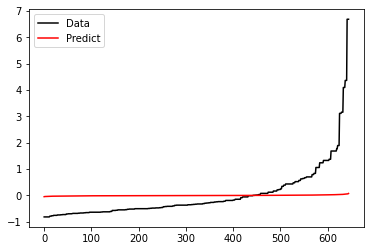

In [16]:
import matplotlib.pyplot as plt
y = dataset['MVPA']
sorted(y)
plt.plot(range(len(y)),sorted(y),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()